In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# First download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

class WineKeywordExtractor:
    def __init__(self):
        # Initialize stopwords
        self.stop_words = set(stopwords.words('english'))

        # Add wine-specific stopwords
        self.wine_stopwords = {
            'wine', 'drink', 'bottle', 'glass', 'wines', 'drinking',
            'bottles', 'glasses', 'ml', 'percent', 'alcohol', 'palate',
            'nose', 'finish', 'flavors', 'notes', 'aromas', 'shows',
            'offers', 'features', 'displays'
        }
        self.stop_words.update(self.wine_stopwords)

    def preprocess_text(self, text_series):
        processed_texts = []

        for text in text_series:
            # Convert to lowercase
            text = str(text).lower()

            # Tokenize
            tokens = word_tokenize(text)

            # Remove stopwords and non-alphabetic tokens
            tokens = [token for token in tokens
                     if token.isalpha() and token not in self.stop_words]

            processed_texts.extend(tokens)

        return processed_texts

    def analyze_keywords(self, text_data, top_n=30):
        """Generate keyword frequency analysis"""
        tokens = self.preprocess_text(text_data)
        word_freq = Counter(tokens)

        # Get top N most common words
        return pd.DataFrame(word_freq.most_common(top_n),
                          columns=['word', 'frequency'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/winemag-data_first150k.csv")

df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
import pandas as pd
from collections import Counter
import re  # We'll use regex for tokenization instead

class WineKeywordExtractor:
    def __init__(self):
        # Define stopwords without relying on NLTK
        self.stop_words = {
            'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for',
            'from', 'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on',
            'that', 'the', 'to', 'was', 'were', 'will', 'with',
            # Wine-specific stopwords
            'wine', 'drink', 'bottle', 'glass', 'wines', 'drinking',
            'bottles', 'glasses', 'ml', 'percent', 'alcohol', 'palate',
            'nose', 'finish', 'flavors', 'notes', 'aromas', 'shows',
            'offers', 'features', 'displays', 'this', 'while', 'also'
        }

    def tokenize(self, text):
        # Convert to lowercase
        text = str(text).lower()
        # Split on non-alphabetic characters and filter
        words = re.findall(r'\b[a-z]+\b', text)
        # Remove stopwords and short words
        return [w for w in words if w not in self.stop_words and len(w) > 2]

    def analyze_keywords(self, text_data, top_n=30):
        """Generate keyword frequency analysis"""
        # Process all texts
        all_tokens = []
        for text in text_data:
            tokens = self.tokenize(text)
            all_tokens.extend(tokens)

        # Count frequencies
        word_freq = Counter(all_tokens)

        # Get top N most common words
        return pd.DataFrame(word_freq.most_common(top_n),
                          columns=['word', 'frequency'])

# Use the class
extractor = WineKeywordExtractor()

# Get keyword analysis
keyword_analysis = extractor.analyze_keywords(df['description'])
print("\nTop keywords and their frequencies:")
print(keyword_analysis)


Top keywords and their frequencies:
          word  frequency
0        fruit      60474
1          but      48655
2       cherry      32770
3      acidity      32662
4      tannins      32240
5         ripe      27096
6        black      26591
7          dry      24942
8        spice      23096
9        sweet      22579
10         now      21758
11        rich      21433
12         oak      21086
13         red      21013
14       berry      18606
15       there      18378
16       fresh      18099
17        soft      17870
18        good      17326
19        very      16208
20  blackberry      15184
21        some      14450
22        full      14376
23        well      14352
24       crisp      14030
25     vanilla      13956
26         not      13806
27        plum      13789
28       blend      13750
29        more      13639



Wine Review Keywords Analysis:
          word  frequency         category
0        fruit      60474          Flavors
1       cherry      32770          Flavors
2      acidity      32662        Structure
3      tannins      32240        Structure
4         ripe      27096  Characteristics
5        black      26591           Colors
6          dry      24942        Structure
7        spice      23096          Flavors
8        sweet      22579          Flavors
9          now      21758            Other
10        rich      21433  Characteristics
11         oak      21086            Aging
12         red      21013           Colors
13       berry      18606          Flavors
14       fresh      18099  Characteristics
15        soft      17870        Structure
16  blackberry      15184          Flavors
17     vanilla      13956          Flavors
18        plum      13789          Flavors
19       blend      13750            Aging


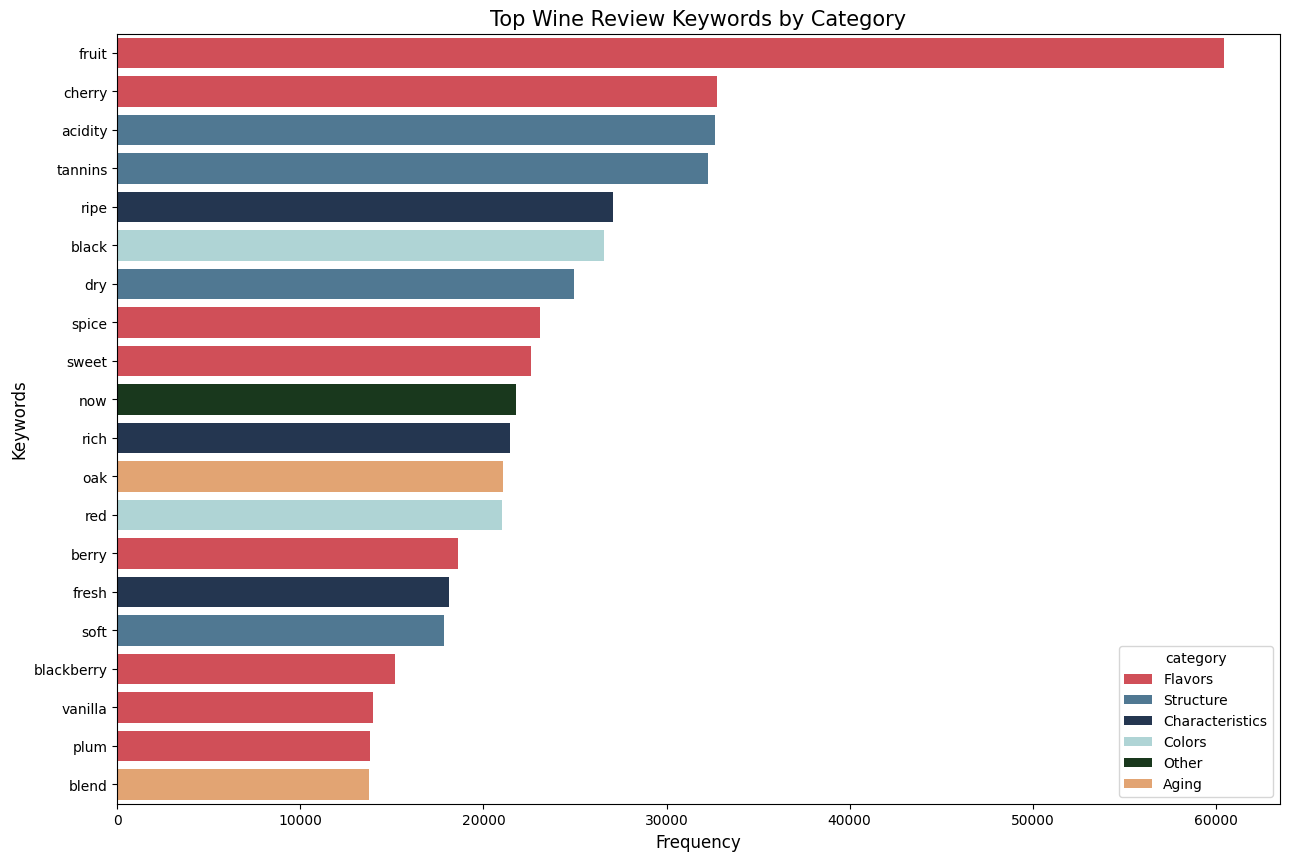

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create categories for wine-related terms
keyword_categories = {
    'Flavors': ['fruit', 'cherry', 'berry', 'blackberry', 'plum', 'vanilla', 'sweet', 'spice'],
    'Structure': ['acidity', 'tannins', 'dry', 'crisp', 'soft'],
    'Characteristics': ['ripe', 'fresh', 'rich', 'full'],
    'Colors': ['black', 'red'],
    'Aging': ['oak', 'blend'],
    'Other': ['but', 'now', 'there', 'good', 'very', 'some', 'well', 'not', 'more']
}

# Create styled table
def create_styled_table(keyword_data):
    # Convert to DataFrame if it's not already
    if not isinstance(keyword_data, pd.DataFrame):
        keyword_data = pd.DataFrame(keyword_data)

    # Add category column
    def get_category(word):
        for category, words in keyword_categories.items():
            if word in words:
                return category
        return 'Other'

    keyword_data['category'] = keyword_data['word'].apply(get_category)

    # Create table with formatting
    styled_table = keyword_data.style.set_properties(**{
        'background-color': 'black',
        'color': 'white',
        'border-color': 'white'
    })

    return keyword_data

# Create visualization
def create_keyword_visualization(keyword_data):
    plt.figure(figsize=(15, 10))

    # Create color palette for categories
    category_colors = {
        'Flavors': '#E63946',
        'Structure': '#457B9D',
        'Characteristics': '#1D3557',
        'Colors': '#A8DADC',
        'Aging': '#F4A261',
        'Other': '#143d19'
    }

    # Create barplot
    sns.barplot(
        data=keyword_data.head(20),  # Show top 20 for better visibility
        x='frequency',
        y='word',
        hue='category',
        palette=category_colors
    )

    plt.title('Top Wine Review Keywords by Category', fontsize=15)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Keywords', fontsize=12)

    return plt

# Assuming your keyword_analysis DataFrame is already created
keyword_data = pd.DataFrame({
    'word': ['fruit', 'cherry', 'acidity', 'tannins', 'ripe', 'black', 'dry', 'spice',
             'sweet', 'now', 'rich', 'oak', 'red', 'berry', 'fresh', 'soft', 'blackberry',
             'vanilla', 'plum', 'blend'],
    'frequency': [60474, 32770, 32662, 32240, 27096, 26591, 24942, 23096,
                 22579, 21758, 21433, 21086, 21013, 18606, 18099, 17870, 15184,
                 13956, 13789, 13750]
})

# Create and display the styled table
categorized_data = create_styled_table(keyword_data)
print("\nWine Review Keywords Analysis:")
print(categorized_data)

# Create and display the visualization
plt.show(create_keyword_visualization(categorized_data))

Number of words in analysis: 80


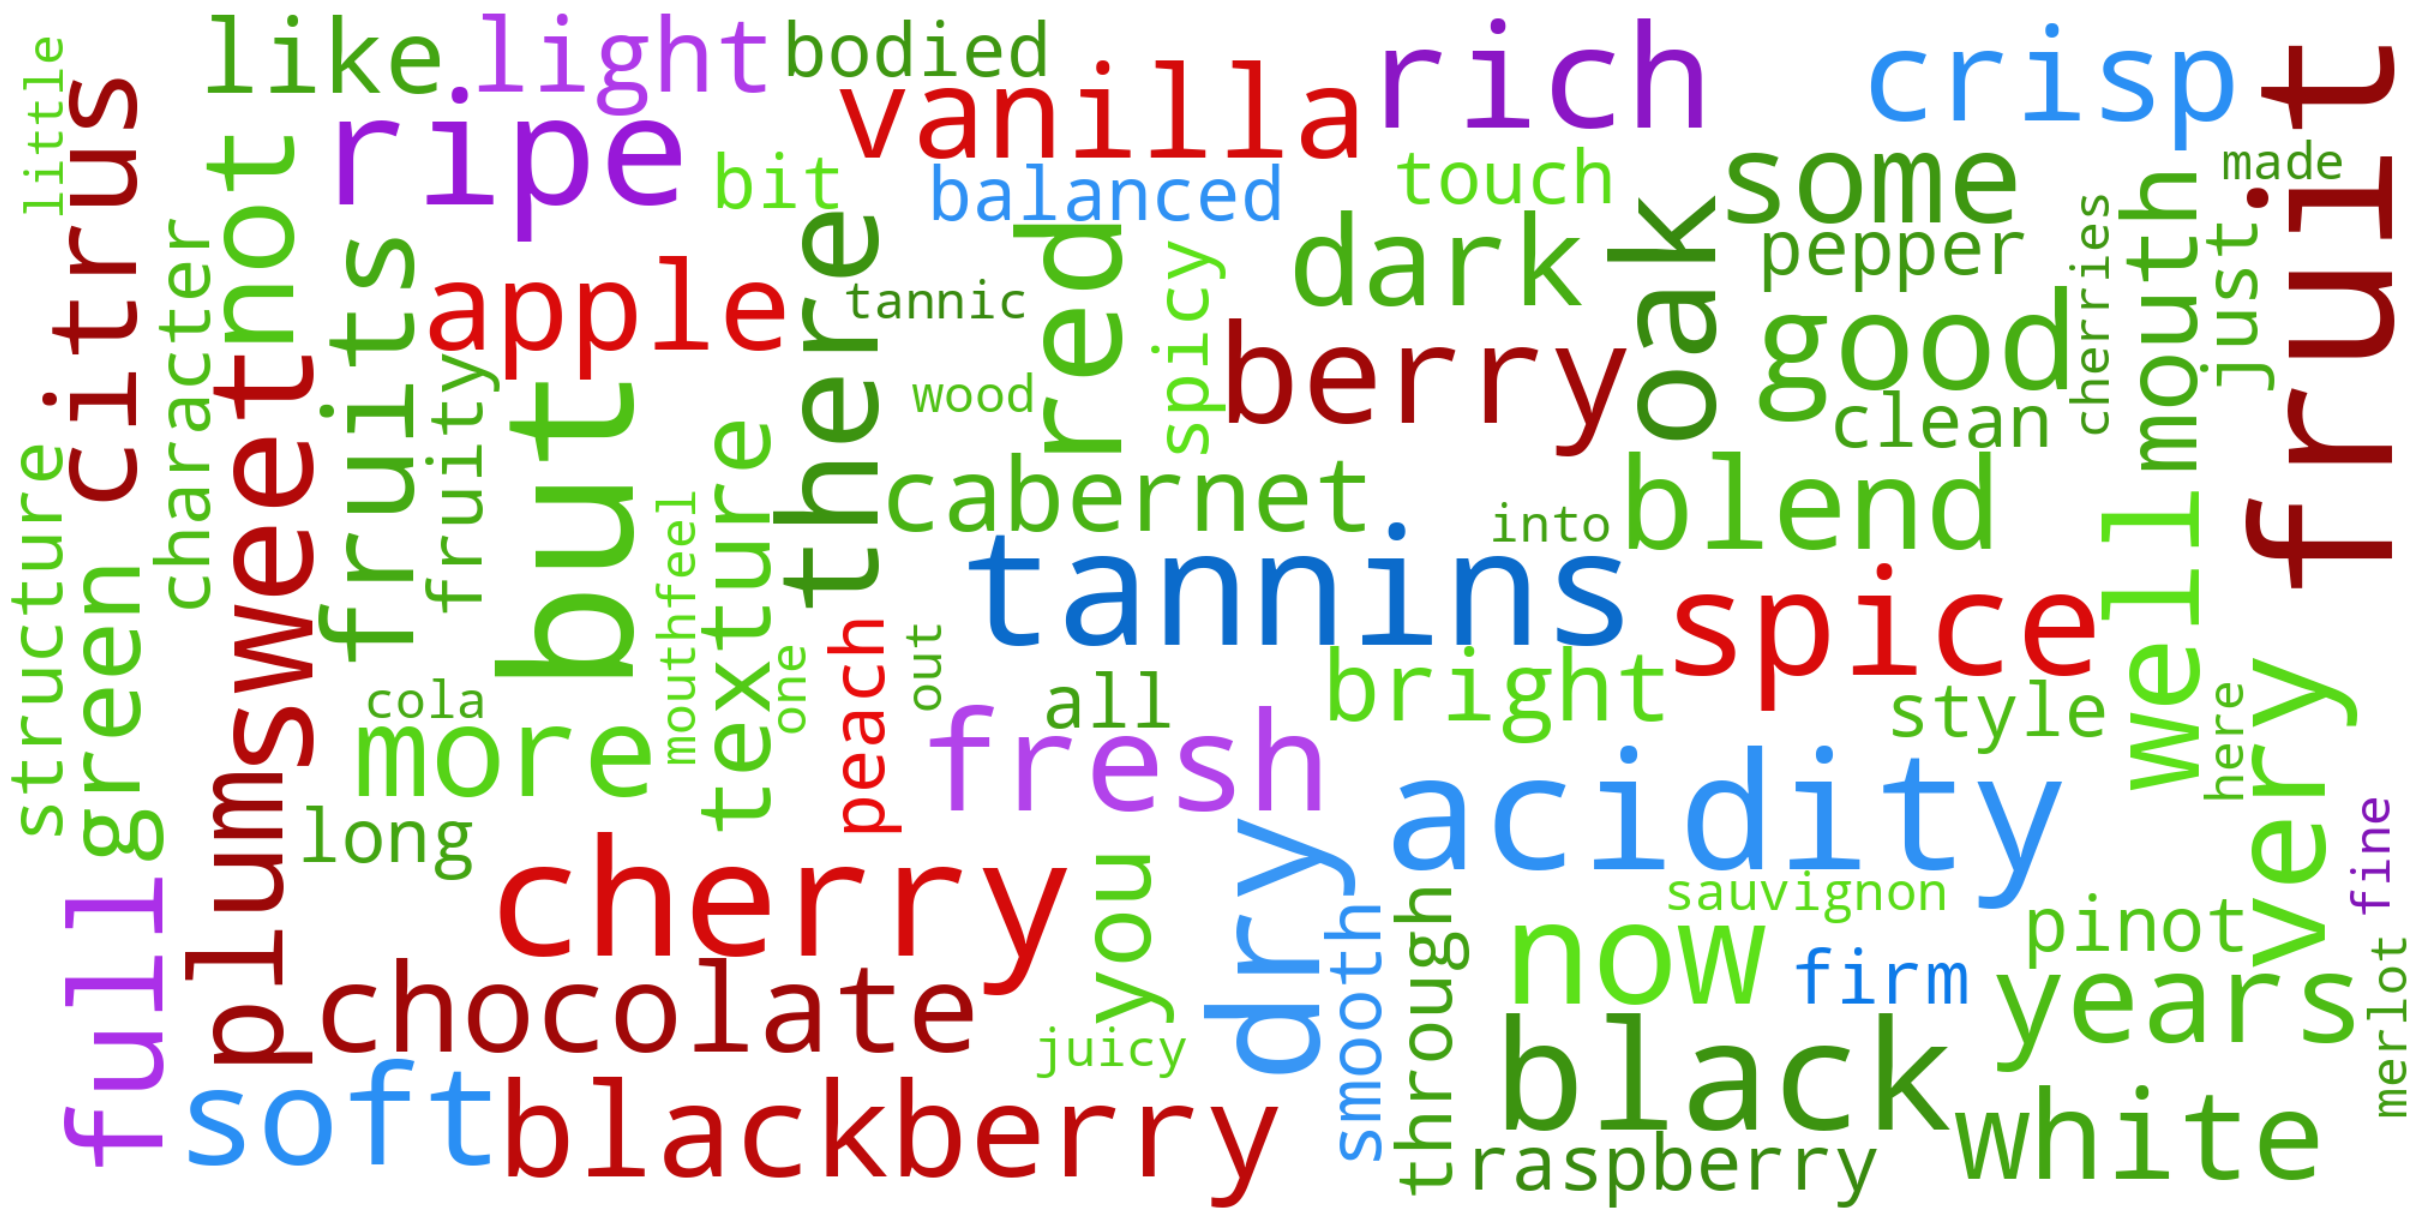


All words included:
1. fruit: 60474
2. but: 48655
3. cherry: 32770
4. acidity: 32662
5. tannins: 32240
6. ripe: 27096
7. black: 26591
8. dry: 24942
9. spice: 23096
10. sweet: 22579
11. now: 21758
12. rich: 21433
13. oak: 21086
14. red: 21013
15. berry: 18606
16. there: 18378
17. fresh: 18099
18. soft: 17870
19. good: 17326
20. very: 16208
21. blackberry: 15184
22. some: 14450
23. full: 14376
24. well: 14352
25. crisp: 14030
26. vanilla: 13956
27. not: 13806
28. plum: 13789
29. blend: 13750
30. more: 13639
31. years: 12811
32. dark: 12703
33. citrus: 12371
34. fruits: 12314
35. chocolate: 12283
36. white: 12200
37. apple: 12081
38. cabernet: 11999
39. mouth: 11828
40. like: 11712
41. green: 11380
42. light: 11297
43. texture: 10787
44. you: 10377
45. bright: 10301
46. raspberry: 10163
47. pepper: 9594
48. through: 9586
49. pinot: 9525
50. balanced: 9267
51. character: 9106
52. bit: 9104
53. bodied: 9097
54. fruity: 9087
55. touch: 9058
56. peach: 9023
57. long: 9017
58. all: 9003
59. f

In [ ]:
# First, make sure we have the full data from our original analysis
keyword_analysis = extractor.analyze_keywords(df['description'], top_n=80)  # Explicitly request 80 words

# Verify the number of words
print(f"Number of words in analysis: {len(keyword_analysis)}")

# Create the word cloud with all 50 words
word_freq_dict = dict(zip(keyword_analysis['word'], keyword_analysis['frequency']))

def custom_color_func(word=None, font_size=None, position=None,
                     orientation=None, font_path=None, random_state=None):
    flavor_words = {'fruit', 'cherry', 'berry', 'blackberry', 'plum', 'vanilla',
                   'spice', 'sweet', 'chocolate', 'apple', 'citrus', 'peach'}
    structure_words = {'acidity', 'tannins', 'dry', 'crisp', 'soft', 'smooth',
                      'firm', 'structured', 'balanced', 'dense'}
    characteristic_words = {'ripe', 'fresh', 'rich', 'full', 'complex', 'elegant',
                          'fine', 'intense', 'light', 'delicate'}

    if word.lower() in flavor_words:
        return f"hsl(0, 90%, {np.random.randint(30, 50)}%)"  # Deep reds
    elif word.lower() in structure_words:
        return f"hsl(210, 90%, {np.random.randint(40, 60)}%)"  # Deep blues
    elif word.lower() in characteristic_words:
        return f"hsl(280, 80%, {np.random.randint(40, 60)}%)"  # Deep purples
    else:
        return f"hsl(100, 80%, {np.random.randint(30, 50)}%)"  # Deep greens

# Create WordCloud
wordcloud = WordCloud(
    width=2000,
    height=1000,
    background_color='white',
    prefer_horizontal=0.6,
    color_func=custom_color_func,
    min_font_size=10,
    max_font_size=160,
    relative_scaling=0.3,
    random_state=42,
    collocations=False,
).generate_from_frequencies(word_freq_dict)

# Display
plt.figure(figsize=(24, 12), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Print all words to verify
print("\nAll words included:")
for i, (word, freq) in enumerate(sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)):
    print(f"{i+1}. {word}: {freq}")

# Acorss Country Analysis

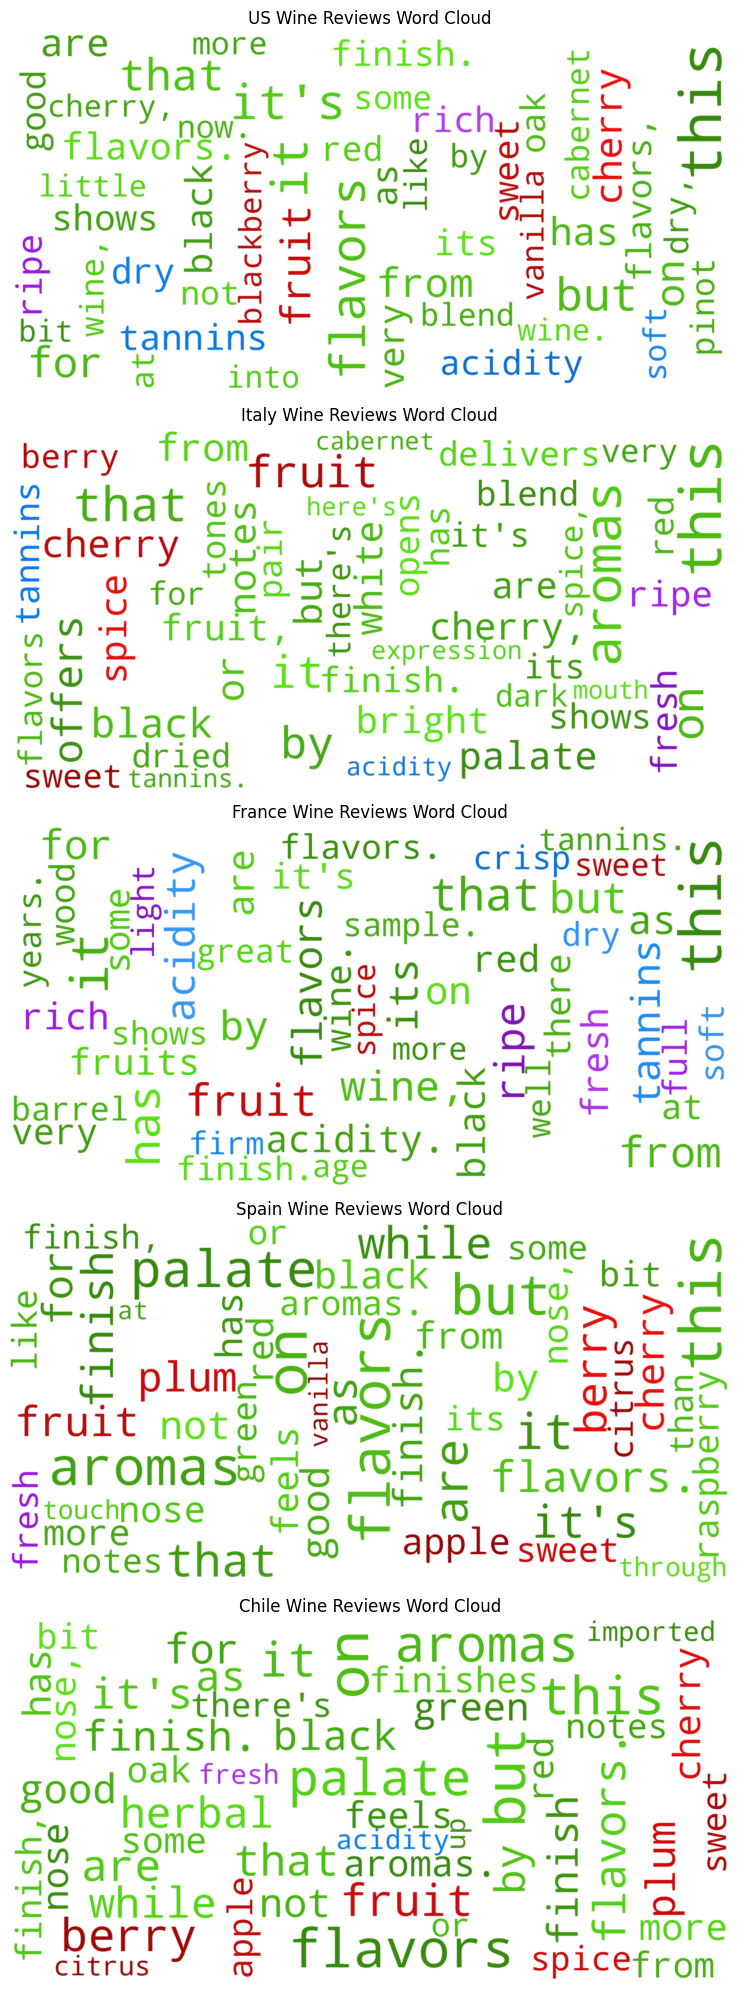

ValueError: Invalid RGBA argument: 'hsl(100, 80%, 35%)'

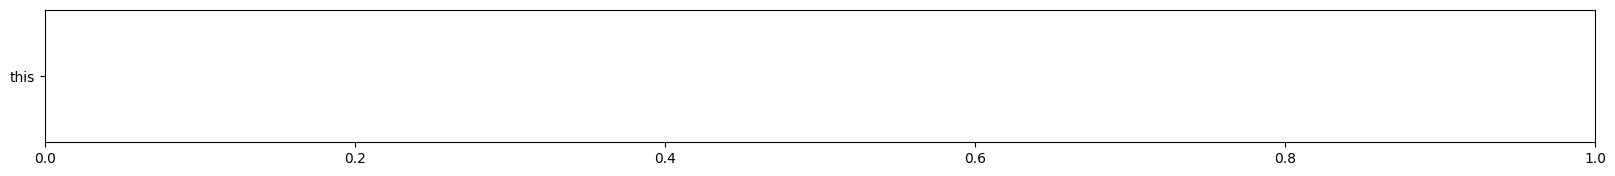

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

class WineCountryAnalyzer:
    def __init__(self, df):
        self.df = df
        self.setup_categories()

    def setup_categories(self):
        # Define word categories
        self.flavor_words = {'fruit', 'cherry', 'berry', 'blackberry', 'plum', 'vanilla',
                           'spice', 'sweet', 'chocolate', 'apple', 'citrus', 'peach'}
        self.structure_words = {'acidity', 'tannins', 'dry', 'crisp', 'soft', 'smooth',
                              'firm', 'structured', 'balanced', 'dense'}
        self.characteristic_words = {'ripe', 'fresh', 'rich', 'full', 'complex', 'elegant',
                                   'fine', 'intense', 'light', 'delicate'}

    def get_word_category(self, word):
        if word in self.flavor_words:
            return 'Flavor'
        elif word in self.structure_words:
            return 'Structure'
        elif word in self.characteristic_words:
            return 'Characteristic'
        return 'Other'

    def custom_color_func(self, word, **kwargs):
        if word.lower() in self.flavor_words:
            return f"hsl(0, 90%, {np.random.randint(30, 50)}%)"
        elif word.lower() in self.structure_words:
            return f"hsl(210, 90%, {np.random.randint(40, 60)}%)"
        elif word.lower() in self.characteristic_words:
            return f"hsl(280, 80%, {np.random.randint(40, 60)}%)"
        return f"hsl(100, 80%, {np.random.randint(30, 50)}%)"

    def analyze_country(self, country, top_n=30):
        # Filter for country
        country_data = self.df[self.df['country'] == country]

        # Tokenize and count words
        words = ' '.join(country_data['description']).lower().split()
        word_freq = Counter(words)

        # Remove common stopwords
        stopwords = {'wine', 'drink', 'the', 'and', 'is', 'in', 'to', 'with', 'of', 'a', 'an'}
        word_freq = {k: v for k, v in word_freq.items() if k not in stopwords}

        # Get top words
        top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n])

        return top_words

    def create_country_comparison(self, countries, top_n=30):
        plt.figure(figsize=(20, 10))

        for i, country in enumerate(countries):
            # Create subplot for each country
            plt.subplot(len(countries), 1, i+1)

            # Get word frequencies
            word_freq = self.analyze_country(country, top_n)

            # Create bars
            words = list(word_freq.keys())[:15]  # Show top 15 for clarity
            freqs = [word_freq[w] for w in words]

            # Create color-coded bars
            colors = [self.custom_color_func(w) for w in words]
            plt.barh(words, freqs, color=colors)

            plt.title(f'Top Words in {country} Wine Reviews')
            plt.xlabel('Frequency')

        plt.tight_layout()
        return plt

    def create_country_wordcloud(self, country, top_n=50):
        word_freq = self.analyze_country(country, top_n)

        wordcloud = WordCloud(
            width=2000,
            height=1000,
            background_color='white',
            prefer_horizontal=0.6,
            color_func=self.custom_color_func,
            min_font_size=10,
            max_font_size=160,
            relative_scaling=0.3,
            random_state=42,
            collocations=False,
        ).generate_from_frequencies(word_freq)

        return wordcloud

    def create_category_distribution(self, countries):
        results = []
        for country in countries:
            word_freq = self.analyze_country(country)
            category_counts = {
                'Country': country,
                'Flavor': sum(1 for w in word_freq if w in self.flavor_words),
                'Structure': sum(1 for w in word_freq if w in self.structure_words),
                'Characteristic': sum(1 for w in word_freq if w in self.characteristic_words),
                'Other': sum(1 for w in word_freq if w not in self.flavor_words
                           and w not in self.structure_words
                           and w not in self.characteristic_words)
            }
            results.append(category_counts)

        return pd.DataFrame(results)

# Usage
analyzer = WineCountryAnalyzer(df)

# Get top wine producing countries
top_countries = df['country'].value_counts().head(5).index.tolist()

# Create word clouds for each country
plt.figure(figsize=(20, 4*len(top_countries)))
for i, country in enumerate(top_countries):
    plt.subplot(len(top_countries), 1, i+1)
    wordcloud = analyzer.create_country_wordcloud(country)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{country} Wine Reviews Word Cloud')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Create bar chart comparison
comparison_plot = analyzer.create_country_comparison(top_countries)
plt.show()

# Create category distribution table
category_dist = analyzer.create_category_distribution(top_countries)
print("\nCategory Distribution by Country:")
print(category_dist)

# *Sentiment Analysis Section*

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

class WineSentimentAnalyzer:
    def __init__(self):
        self.analyzer = SentimentIntensityAnalyzer()

    def analyze_sentiment(self, text_data):
        sentiment_scores = []
        for text in text_data:
            sentiment = self.analyzer.polarity_scores(text)
            sentiment_scores.append(sentiment)

        sentiment_df = pd.DataFrame(sentiment_scores)
        sentiment_df['overall_sentiment'] = sentiment_df.compound.apply(self.get_sentiment_label)

        return sentiment_df

    def get_sentiment_label(self, compound_score):
        if compound_score >= 0.05:
            return 'Positive'
        elif compound_score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

# Load data
df = pd.read_csv("/content/drive/My Drive/winemag-data_first150k.csv")

# Create WineSentimentAnalyzer
analyzer = WineSentimentAnalyzer()

# Sentiment analysis on the 'description' column
sentiment_results = analyzer.analyze_sentiment(df['description'])

df = pd.concat([df, sentiment_results], axis=1)

# Print the updated dataframe
print(df.head())

# Analyze the distribution of sentiment labels
sentiment_counts = df['overall_sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)

# Analyze the relationship between sentiment and price
sentiment_price = df.groupby('overall_sentiment')['price'].mean()
print("\nAverage Price by Sentiment:")
print(sentiment_price)

# Analyze the relationship between sentiment and points (rating)
sentiment_points = df.groupby('overall_sentiment')['points'].mean()
print("\nAverage Points by Sentiment:")
print(sentiment_points)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               